# Plot the Graph for the total number of issues with different labels created and closed on every date on GitHub for SPM587FA17 issues project

### Example of Issue Form Filled out

### Data Set File:  SPM587FA17issues.json

In [1]:
import os

import cPickle as pickle

import pandas as pd                                    # panda's nickname is pd

import numpy as np                                     # numpy as np

from pandas import DataFrame, Series                   # for convenience

import matplotlib.pyplot as plt

%matplotlib inline



# Requirement : Get the total number of issues with different labels for every date and plot them in a stacked chart

In [2]:
# Read the JSON file into a list of dictionaries

import json
list_of_issues_dict_data = [json.loads(line) for line in open('SPM587FA17issues.json')]

In [3]:
# Create the DataFrame object for the list_of_issues_dict_data object

issues_df = DataFrame(list_of_issues_dict_data)

In [4]:
# Sanity test: print first 10 rows in our DataFrame

issues_df
    

,Author,State,closed_at,created_at,issue_number,labels
0,SFA17SCM01M,closed,2017-11-21,2017-11-14,524,"[Category:Bug, DetectionPhase:Testing, Origina..."
1,SFA17SCM01M,closed,2017-11-14,2017-11-14,523,"[Category:Bug, DetectionPhase:Design, Originat..."
2,SFA17SCM15H,closed,2017-11-12,2017-11-11,521,"[Category:Bug, DetectionPhase:Testing, Origina..."
3,EFA17SCM54A,closed,2017-11-13,2017-11-10,518,"[Category:Inquiry, DetectionPhase:Field, Origi..."
4,snurukurthi,closed,2017-11-12,2017-11-10,516,"[Category:Bug, DetectionPhase:Testing, Origina..."
5,CFA17SCM37A,closed,2017-11-12,2017-11-10,511,"[Category:Bug, DetectionPhase:Testing, Origina..."
6,AFA17SCM18K,open,None,2017-11-10,509,"[Category:Inquiry, DetectionPhase:Field, Origi..."
7,AFA17SCM18K,closed,2017-11-10,2017-11-10,506,"[Category:Inquiry, DetectionPhase:Field, Origi..."
8,CFA17SCM93S,closed,2017-11-12,2017-11-10,505,"[Category:Bug, DetectionPhase:Testing, Origina..."
9,SFA17SCM46N,closed,2017-11-12,2017-11-10,511,"[Category:Inquiry, DetectionPhase:Field, Origi..."


In [5]:
# Prepare and Clean the dataframe object

wrangled_issues_df = issues_df[['Author','State','closed_at','created_at','issue_number','labels']]
wrangled_issues_df.loc[0:len(wrangled_issues_df), 'OriginationPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'DetectionPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Category']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Priority']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Status']= np.NaN


In [6]:
wrangled_issues_df

,Author,State,closed_at,created_at,issue_number,labels,OriginationPhase,DetectionPhase,Category,Priority,Status
0,SFA17SCM01M,closed,2017-11-21,2017-11-14,524,"[Category:Bug, DetectionPhase:Testing, Origina...",NaN,NaN,NaN,NaN,NaN
1,SFA17SCM01M,closed,2017-11-14,2017-11-14,523,"[Category:Bug, DetectionPhase:Design, Originat...",NaN,NaN,NaN,NaN,NaN
2,SFA17SCM15H,closed,2017-11-12,2017-11-11,521,"[Category:Bug, DetectionPhase:Testing, Origina...",NaN,NaN,NaN,NaN,NaN
3,EFA17SCM54A,closed,2017-11-13,2017-11-10,518,"[Category:Inquiry, DetectionPhase:Field, Origi...",NaN,NaN,NaN,NaN,NaN
4,snurukurthi,closed,2017-11-12,2017-11-10,516,"[Category:Bug, DetectionPhase:Testing, Origina...",NaN,NaN,NaN,NaN,NaN
5,CFA17SCM37A,closed,2017-11-12,2017-11-10,511,"[Category:Bug, DetectionPhase:Testing, Origina...",NaN,NaN,NaN,NaN,NaN
6,AFA17SCM18K,open,None,2017-11-10,509,"[Category:Inquiry, DetectionPhase:Field, Origi...",NaN,NaN,NaN,NaN,NaN
7,AFA17SCM18K,closed,2017-11-10,2017-11-10,506,"[Category:Inquiry, DetectionPhase:Field, Origi...",NaN,NaN,NaN,NaN,NaN
8,CFA17SCM93S,closed,2017-11-12,2017-11-10,505,"[Category:Bug, DetectionPhase:Testing, Origina...",NaN,NaN,NaN,NaN,NaN
9,SFA17SCM46N,closed,2017-11-12,2017-11-10,511,"[Category:Inquiry, DetectionPhase:Field, Origi...",NaN,NaN,NaN,NaN,NaN


In [7]:
for i in range(0, len(wrangled_issues_df)):
   if wrangled_issues_df.iloc[i]['labels']:
        for label in wrangled_issues_df.iloc[i]['labels']:
            label_name= (label.split(':'))[0]
            label_value= (label.split(':'))[1]
            wrangled_issues_df.loc[i, label_name]=label_value
 

In [8]:
wrangled_issues_df

,Author,State,closed_at,created_at,issue_number,labels,OriginationPhase,DetectionPhase,Category,Priority,Status
0,SFA17SCM01M,closed,2017-11-21,2017-11-14,524,"[Category:Bug, DetectionPhase:Testing, Origina...",Requirements,Testing,Bug,Major,Completed
1,SFA17SCM01M,closed,2017-11-14,2017-11-14,523,"[Category:Bug, DetectionPhase:Design, Originat...",Requirements,Design,Bug,Critical,inProgress
2,SFA17SCM15H,closed,2017-11-12,2017-11-11,521,"[Category:Bug, DetectionPhase:Testing, Origina...",Design,Testing,Bug,Major,Approved
3,EFA17SCM54A,closed,2017-11-13,2017-11-10,518,"[Category:Inquiry, DetectionPhase:Field, Origi...",Coding,Field,Inquiry,High,inProgress
4,snurukurthi,closed,2017-11-12,2017-11-10,516,"[Category:Bug, DetectionPhase:Testing, Origina...",Requirements,Testing,Bug,Critical,Approved
5,CFA17SCM37A,closed,2017-11-12,2017-11-10,511,"[Category:Bug, DetectionPhase:Testing, Origina...",Requirements,Testing,Bug,Critical,Approved
6,AFA17SCM18K,open,None,2017-11-10,509,"[Category:Inquiry, DetectionPhase:Field, Origi...",Documentation,Field,Inquiry,Medium,pendingReview
7,AFA17SCM18K,closed,2017-11-10,2017-11-10,506,"[Category:Inquiry, DetectionPhase:Field, Origi...",Coding,Field,Inquiry,High,inProgress
8,CFA17SCM93S,closed,2017-11-12,2017-11-10,505,"[Category:Bug, DetectionPhase:Testing, Origina...",Requirements,Testing,Bug,Major,Completed
9,SFA17SCM46N,closed,2017-11-12,2017-11-10,511,"[Category:Inquiry, DetectionPhase:Field, Origi...",Coding,Field,Inquiry,High,inProgress


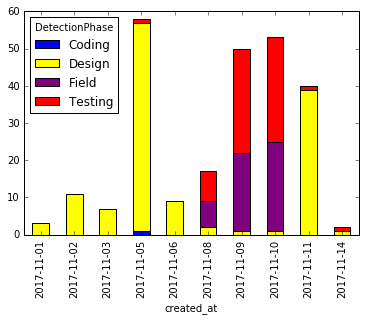

In [9]:
# Plot in Bar Chart the total number of issues created every day for every Detaction Phase

LabelsReviewedByDate = wrangled_issues_df.groupby(['created_at','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green'], grid=False)

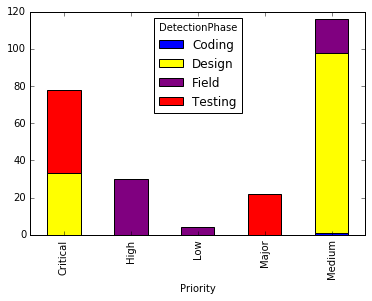

In [10]:
# Plot in Bar Chart the total number of issues created for every Phase based on thier priorites

LabelsReviewedByDate = wrangled_issues_df.groupby(['Priority','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green'], grid=False)

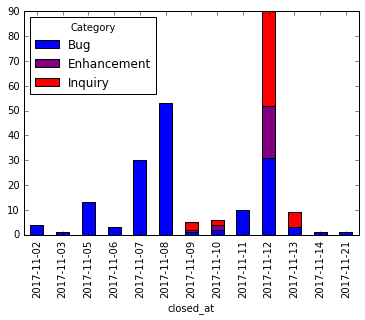

In [11]:
# Plot in Bar Chart the total number of issues closed every day for every Category

LabelsReviewedByDate = wrangled_issues_df.groupby(['closed_at','Category']).closed_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue', 'purple', 'red'], grid=False)

#  Requirement #1: Plot in Bar Chart the total number of issues closed every day for every Origination Phase


In [12]:
# Requirement #1: Add your code here



#  Requirement #2: # Plot in Bar Chart the total number of issues created for every Phase based on their Status



In [13]:
# Requirement #2: Add your code here

